In [1]:
from ase.io import read
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path2dump = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/ml/depth15/0deg_1000eV/dump.lammpstrj'
# atoms = read(path2dump, index=0, format='lammps-dump-text')

In [64]:
from ovito.io import import_file
from ovito.io.ase import ovito_to_ase

# Import a sequence of files.
pipeline = import_file(path2dump)

ase_atoms_list = []

# Loop over all frames of the sequence.
for frame_index in range(pipeline.source.num_frames):

    # Calling FileSource.compute() loads the requested frame
    # from the sequence into memory and returns the data as a new
    # DataCollection:
    data = pipeline.source.compute(frame_index)
    ase_atoms = ovito_to_ase(data)
    ase_atoms_list.append(ase_atoms)

    # The source path and the index of the current frame
    # are attached as attributes to the data collection:
    print('Frame source:', data.attributes['SourceFile'])
    print('Frame index:', data.attributes['SourceFrame'])
    break

Frame source: /Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/ml/depth15/0deg_1000eV/dump.lammpstrj
Frame index: 0


In [72]:
atoms = ase_atoms_list[0]
coord = atoms.get_positions()
cell = atoms.get_cell()

In [73]:
atoms.symbols

Symbols('H11250')

(0.0, 149.325)

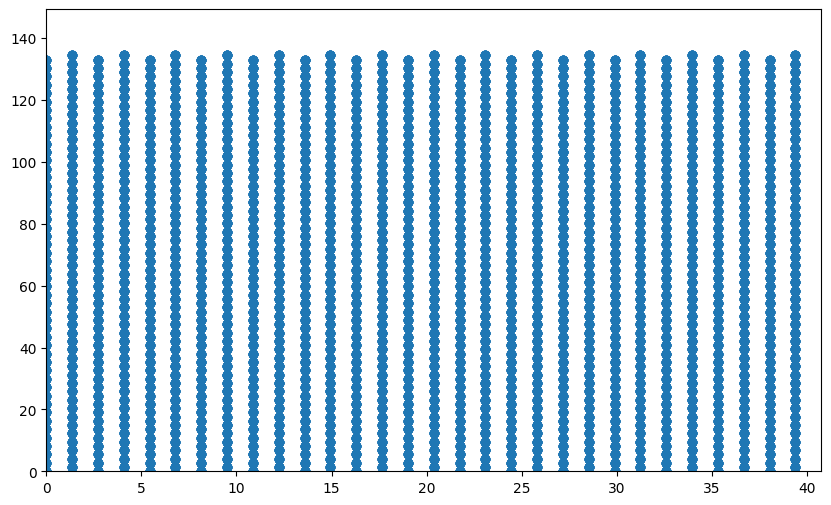

In [74]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.scatter(coord[:, 0], coord[:, 2])
ax.set_xlim(0, cell[0].max())
ax.set_ylim(0, cell[2].max())

In [75]:
# get surface atoms and create new atoms object, and change cell
dividing_z = 0.7 * cell[2, 2]

surface_atoms = atoms[atoms.positions[:, 2] > dividing_z].copy()
surface_atoms.set_positions(surface_atoms.positions - np.array([0, 0, dividing_z]))
surface_atoms.set_cell(
    np.array([
        [cell[0, 0], 0, 0],
        [0, cell[1, 1], 0],
        [0, 0, cell[2,2] - dividing_z]
    ])
)
surface_atoms.wrap()
surface_atoms.symbols

Symbols('H2587')

In [76]:
divided_atoms_coord = surface_atoms.get_positions()
divided_atoms_cell = surface_atoms.get_cell()

(0.0, 44.7975)

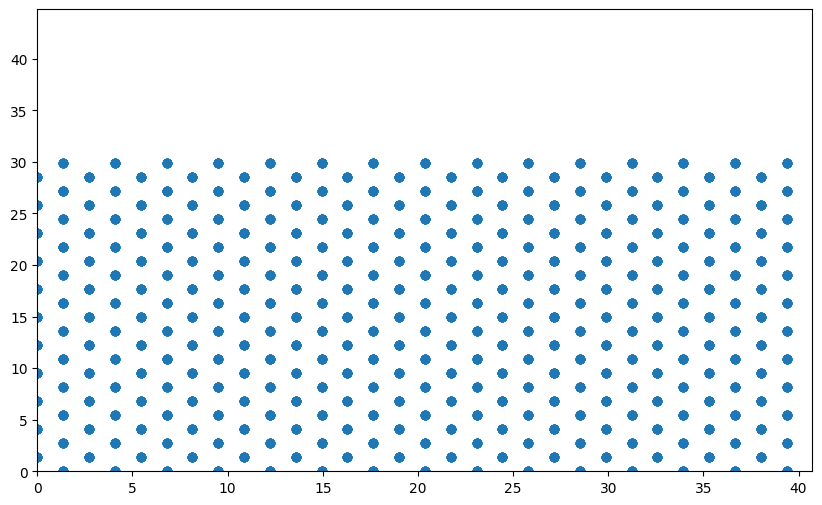

In [77]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.scatter(divided_atoms_coord[:, 0], divided_atoms_coord[:, 2])
ax.set_xlim(0, divided_atoms_cell[0].max())
ax.set_ylim(0, divided_atoms_cell[2].max())